# Unsupervised Learning

The first part of this exercise will be dedicated to implementing the *K*-means **clustering** algorithm and applying it to compress an image. In the second part, the principal component analysis (PCA) will be used in order to find a low-dimensional representation of face images. 

## 1 *K*-means clustering algorithm

Powerfull unsupervised learning algorithm here will be used for image compression. 

### 1.1 Implementing *K*-means

For a given training set {$x^{(1)}, x^{(2)}, ..., x^{(m)}$}, where $x^{(i)} \in \bf{R}^n$, *K*-means algorithm cluster similar data examples together in an arbitrary number of clusters. 

The intuition behind *K*-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The *K*-means algorithm will always converge to some final set of means for the centroids, where the converged solution may not always be ideal and depends on the initial setting of the centroids. This is the reason why, in practice, the *K*-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value.

*K*-means cost function is defined as follows:

$$
J(c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k}) = \frac{1}{m} \sum_{i=1}^{m}|| x^{(i)} - \mu_{c^{(i)}} ||^2
$$

where the optimization objective is to minimize cost function and is defined as follows:

$$
\min\limits_{c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k}} J(c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k})
$$

#### 1.1.1 Finding closest centroids

In the first phase of the *K*-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current poisitions of centroids. For every example $i$ index of the centroid, the index of the centroid that is closest to $x^{(i)}$ is computed as:
$
c^{(i)} := j
$ that minimizes $ || x^{(i)} - \mu_{j} ||^2 $.

In [1]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
dataset = loadmat('data/ex7data2.mat')
print(dataset['__header__'])
X = dataset['X']
print(f'X shape: {X.shape}')

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011'
X shape: (300, 2)


In [8]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0] # no of rows 
    m = X.shape[0] # no of input examples
    idx = np.zeros((m, 1)) 
    
    for i in range(m):
        squared_norm = np.zeros((K, 1))
        for k in range(K):
            squared_norm[k, 0] = (np.linalg.norm(X[i, :] - centroids[k, :]))**2
        idx[i, 0] = np.where(squared_norm==np.min(squared_norm))[0][0]
    return idx.ravel() + 1.

In [9]:
K = 3 
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)

print(f'The closest centroids for the first 3 examples of the dataset: {idx[:3]}')
print('(The closest values should be 1, 3 and 2 respectively.)')

The closest centroids for the first 3 examples of the dataset: [1. 3. 2.]
(The closest values should be 1, 3 and 2 respectively.)


#### 1.1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. For every centroid *k* the mean is calculated as:

$$
\mu_{k} := \frac{1}{|C_{k}|}\sum_{i\in C_{k}}^{}X^{(i)}
$$

where $C_{k}$ is the set of examples that are assigned to centroid *k*.

In [10]:
def computeCentroids(X, idx, K):
    idx = idx.reshape(-1,1)
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        row_k, col_k = np.where(idx==k+1) # k+1: there is no 0 cluster
        centroids[k, :] = 1/len(row_k) * np.sum(X[row_k, :], axis=0)
    return centroids

In [11]:
centroids = computeCentroids(X, idx, K)
print(f'Centroids computed after initial finding of the closest centroids: {centroids}')
print('Expected values: \n[[ 2.428301 3.157924 ]\n [ 5.813503 2.633656 ]\n [ 7.119387 3.616684 ]]')

Centroids computed after initial finding of the closest centroids: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
Expected values: 
[[ 2.428301 3.157924 ]
 [ 5.813503 2.633656 ]
 [ 7.119387 3.616684 ]]


### 1.2 *K*-means on example dataset

In [12]:
def plotProgressMeans(X, centroids, idx, K, i):
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='bwr',label='data')
    plt.plot(centroids[:, 0], centroids[:, 1],
             marker='x', markersize=10, color='black',
             linestyle='None', label='current centroids')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='best')
        

def runKMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    
    for i in range(max_iters):
        print(f'K-means iteration {i+1}/{max_iters}')
        
        # for each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        # plot progress
        if plot_progress:
            plotProgressMeans(X, centroids, idx, K, i)
            plt.show()
        
        # given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

K-means iteration 1/6


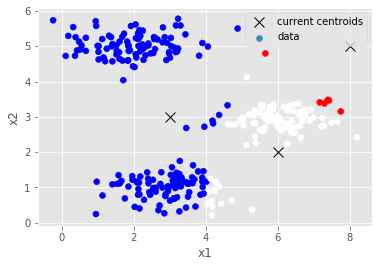

K-means iteration 2/6


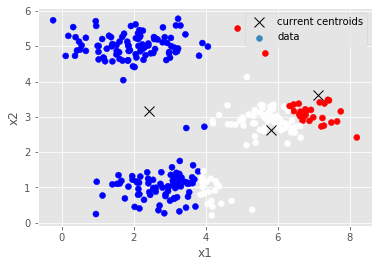

K-means iteration 3/6


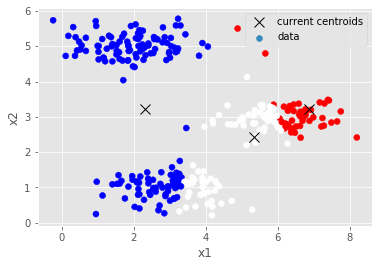

K-means iteration 4/6


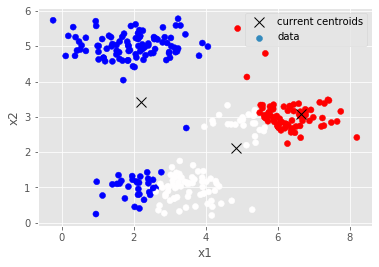

K-means iteration 5/6


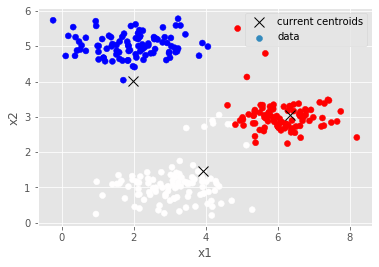

K-means iteration 6/6


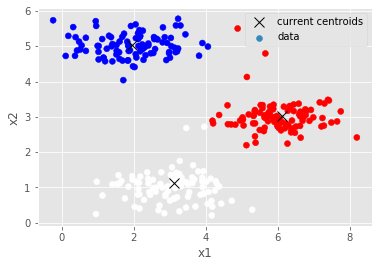

In [13]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
max_iters = 6

centroids, idx = runKMeans(X, initial_centroids, 
                           max_iters, plot_progress=True)

### Scikit Learn *K*-means clustering algorithm on the same data

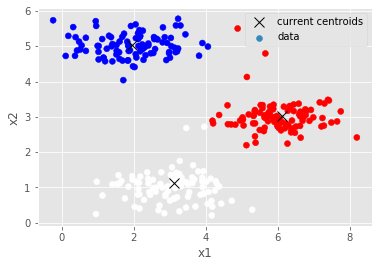

In [14]:
ootb_model = KMeans(n_clusters=3, 
                    init=initial_centroids,
                    n_init=1,
                    max_iter=5,
                    n_jobs=-1,)

skl_idx = ootb_model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=skl_idx, cmap='bwr', label='data')
plt.plot(ootb_model.cluster_centers_[:, 0], 
         ootb_model.cluster_centers_[:, 1],
         marker='x', markersize=10, color='black',
         linestyle='None', label='current centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

### 1.3 Random initialization

A good strategy for initializing the centroids is to select random examples from the training set. 
The idea is to randomly permute the indices of the examples, then select the first *K* examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.

In Sklearn's *KMeans* function, this is already implemented and is called by defining *init='random'*.

In [19]:
def KMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    
    rand_X = np.random.permutation(X)
    centroids = rand_X[:K]
    return centroids

### 1.4 Image compression with *K*-means

For this example, in a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify red, green and blue intensity values. This type of encoding is known as the RGB encoding.

The idea is making the reduction from a thousands of colors to only 16 colors. This is the way to efficiently store images by representing the RGB with 16 colors (only 4 bits for all colors, insetead of 24 for each color).

The *K*-means algorithm will be used to comress images; every pixel will be treated as a data example and will be clustered to 1 (out of 16) clusters that represents some color.

In [20]:
A = plt.imread('data/bird_small.png')
img_size = A.shape
img_size

(128, 128, 3)

In [21]:
# reshape the image into Nx3 matrix where N = number of pixels
# each row will contain the R, G and B pixel values
X = np.reshape(A, (img_size[0]*img_size[1], 3))
X.shape

(16384, 3)

In [25]:
%%time
K = 16
max_iters = 10
initial_centroids = KMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters)

K-means iteration 1/10
K-means iteration 2/10
K-means iteration 3/10
K-means iteration 4/10
K-means iteration 5/10
K-means iteration 6/10
K-means iteration 7/10
K-means iteration 8/10
K-means iteration 9/10
K-means iteration 10/10
CPU times: user 24.7 s, sys: 281 ms, total: 25 s
Wall time: 24.7 s


In [32]:
%%time
# time exec comparisson with the built-in sklearn KMeans function
ootb_model = KMeans(n_clusters=16, 
                    init='random', #using opt builtin param
                    n_init=1,
                    max_iter=10,
                    n_jobs=-1,)

skl_idx = ootb_model.fit_predict(X)

CPU times: user 7.13 ms, sys: 4.08 ms, total: 11.2 ms
Wall time: 48.1 ms


In [45]:
# image compression
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[np.asarray(idx-1, dtype=int), :]
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], 3))

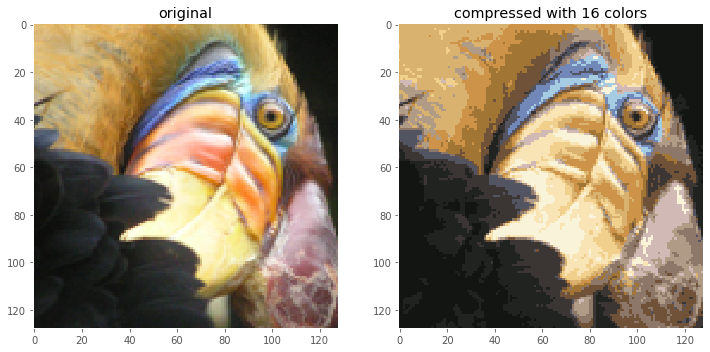

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('original')
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X_recovered)
plt.title(f'compressed with {K} colors')
plt.grid()

### 1.5 *K*-mean on my own image

Since the figure is extremely large, Scikit Learn's version of optimized K-Means algorithm with K-Means++ algorithm for finding initial centroids will be used.

Again, the image will be converted into the 4-bit image.

In [63]:
full = plt.imread('data/my-pretty-face.jpg')
full_size = full.shape
full_size

(2240, 2240, 3)

In [66]:
X = np.reshape(full, (full_size[0]*full_size[1], 3))
X.shape

(5017600, 3)

In [68]:
%%time
# time exec comparisson with the built-in sklearn KMeans function
model = KMeans(n_clusters=16, 
               init='k-means++', #using opt builtin param
               n_init=10,)

idx = model.fit_predict(X)

CPU times: user 3min 34s, sys: 43.5 s, total: 4min 18s
Wall time: 2min 54s


In [76]:
# image compression
centroids = model.cluster_centers_
X_recovered = np.asarray(centroids[np.asarray(idx, dtype=int), :], dtype=int)
X_recovered = np.reshape(X_recovered, (full_size[0], full_size[1], 3))

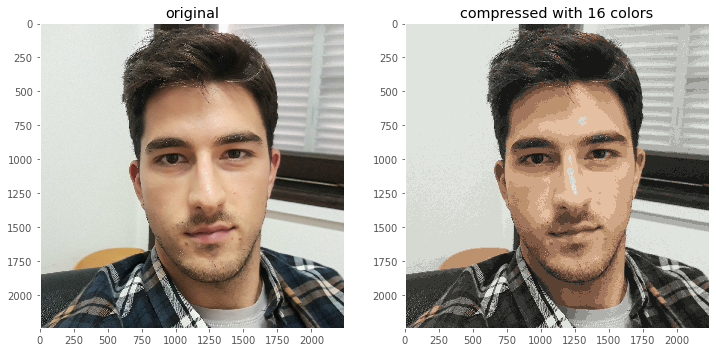

In [77]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(full)
plt.title('original')
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X_recovered)
plt.title(f'compressed with {K} colors')
plt.grid()